/home/FYP/poon0064/.conda/envs/RunJupyter/lib/python3.10/site-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ separable_conv2d_9              │ (None, 28, 28, 32)     │            73 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 602)            │     3,776,346 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         6,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,782,449 (14.43 MB)

 Trainable params: 3,782,449 (14.43 MB)

 Non-trainable params: 0 (0.00 B)

> 90.125
> 89.642
> 89.458
> 89.100
> 90.267


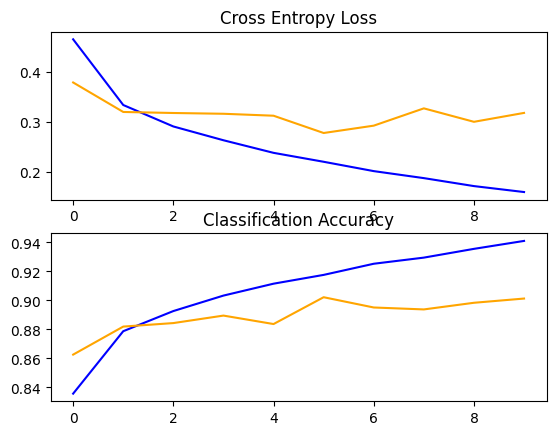

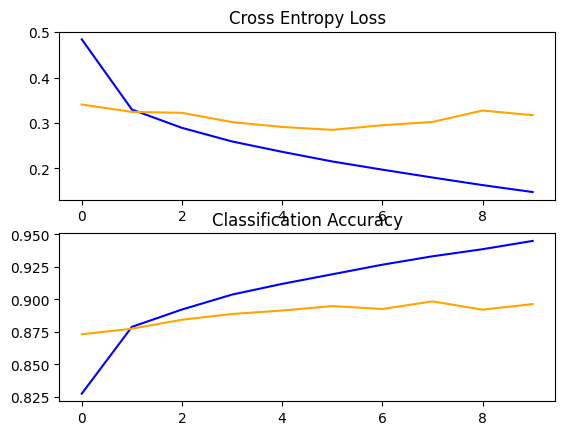

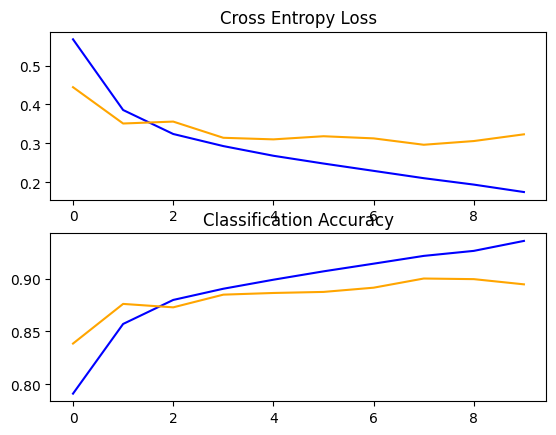

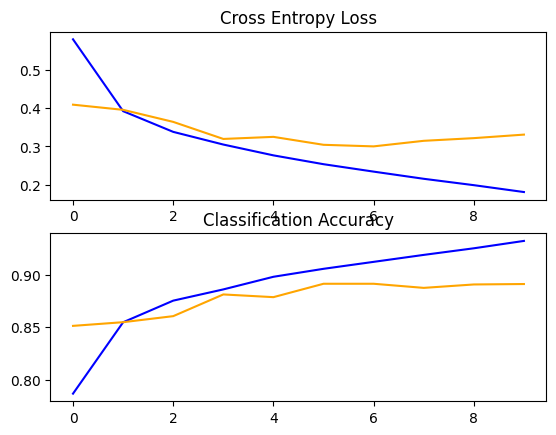

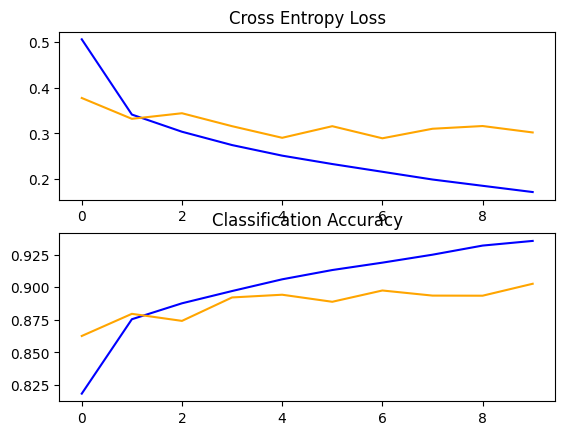

NameError: name 'mean' is not defined

In [6]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import SeparableConv2D
from keras.optimizers import SGD
from sklearn.model_selection import KFold
import numpy as np
from matplotlib import pyplot

def load_dataset():
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):

    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0

    return train_norm, test_norm

def define_model():
     model = Sequential()
     model.add(SeparableConv2D(32, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
     model.add(MaxPooling2D((2, 2)))
     model.add(Flatten())
     model.add(Dense(602, activation='relu', kernel_initializer='he_uniform'))
     model.add(Dense(10, activation='softmax'))
     # compile model
     opt = SGD(learning_rate=0.01, momentum=0.9)
     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
     return model

model = define_model()
model.summary()

def evaluate_model(dataX, dataY, n_folds=5):
     scores, histories = list(), list()
     # prepare cross validation
     kfold = KFold(n_folds, shuffle=True, random_state=1)
     # enumerate splits
     for train_ix, test_ix in kfold.split(dataX):
         # define model
         model = define_model()
         # select rows for train and test
         trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
         # fit model
         history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
         # evaluate model
         _, acc = model.evaluate(testX, testY, verbose=0)
         print('> %.3f' % (acc * 100.0))
         # append scores
         scores.append(acc)
         histories.append(history)
     return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
     for i in range(len(histories)):
         # plot loss
         pyplot.subplot(211)
         pyplot.title('Cross Entropy Loss')
         pyplot.plot(histories[i].history['loss'], color='blue', label='train')
         pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
         # plot accuracy
         pyplot.subplot(212)
         pyplot.title('Classification Accuracy')
         pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
         pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
         pyplot.show()

# summarize model performance
def summarize_performance(scores):
     # print summary
     print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
     # box and whisker plots of results
     pyplot.boxplot(scores)
     pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
     # load dataset
     trainX, trainY, testX, testY = load_dataset()
     # prepare pixel data
     trainX, testX = prep_pixels(trainX, testX)
     # evaluate model
     scores, histories = evaluate_model(trainX, trainY)
     # learning curves
     summarize_diagnostics(histories)
     # summarize estimated performance
     summarize_performance(scores)
 
run_test_harness()